In [1]:
import pandas as pd

In [2]:
dir_url = 'data/'
symbol=['ADAUSDT']

In [3]:
#marked data
df = pd.read_csv("../"+dir_url + symbol[0] + '.csv', index_col=0)
df.head()

,open,high,low,close,volume
time,,,,,
2020-01-31 08:00:00,0.05450,0.05452,0.05383,0.05390,1929860.0
2020-01-31 08:05:00,0.05390,0.05409,0.05385,0.05390,1448223.0
2020-01-31 08:10:00,0.05390,0.05390,0.05383,0.05387,406186.0
2020-01-31 08:15:00,0.05386,0.05397,0.05383,0.05396,578957.0
2020-01-31 08:20:00,0.05396,0.05404,0.05383,0.05383,464677.0


In [4]:
anser_list = []

for i in range(0, len(df)):
    if (max(df['high'][i:i+10])-df['open'][i])/df['open'][i] > 0.01:#1% up
        anser_list.append(1)
    elif (min(df['low'][i:i+10])-df['open'][i])/df['open'][i] < -0.01:#1% down
        anser_list.append(-1)
    else:
        anser_list.append(0)
df['anser'] = anser_list

In [5]:
df.head()

,open,high,low,close,volume,anser
time,,,,,,
2020-01-31 08:00:00,0.05450,0.05452,0.05383,0.05390,1929860.0,-1
2020-01-31 08:05:00,0.05390,0.05409,0.05385,0.05390,1448223.0,1
2020-01-31 08:10:00,0.05390,0.05390,0.05383,0.05387,406186.0,1
2020-01-31 08:15:00,0.05386,0.05397,0.05383,0.05396,578957.0,1
2020-01-31 08:20:00,0.05396,0.05404,0.05383,0.05383,464677.0,1


In [6]:
print(df['anser'].value_counts())

 0    100647
 1     54604
-1     46537
Name: anser, dtype: int64


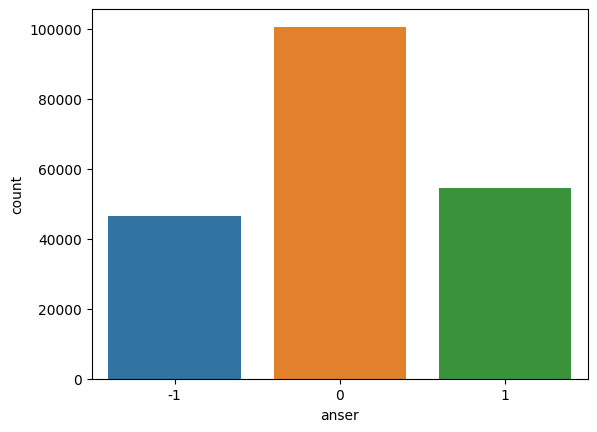

In [7]:
#show anser value counts distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='anser', data=df)
plt.show()

In [9]:
#add more features
df['high-low'] = df['high'] - df['low']
df['rsi'] = df['close'].rolling(14).apply(lambda x: pd.Series(x).value_counts().index[0])
df['rsi'] = df['rsi'].apply(lambda x: 100 - 100 / (1 + x))

In [10]:
df

,open,high,low,close,volume,anser,high-low,rsi
time,,,,,,,,
2020-01-31 08:00:00,0.05450,0.05452,0.05383,0.05390,1929860.0,-1,0.00069,NaN
2020-01-31 08:05:00,0.05390,0.05409,0.05385,0.05390,1448223.0,1,0.00024,NaN
2020-01-31 08:10:00,0.05390,0.05390,0.05383,0.05387,406186.0,1,0.00007,NaN
2020-01-31 08:15:00,0.05386,0.05397,0.05383,0.05396,578957.0,1,0.00014,NaN
2020-01-31 08:20:00,0.05396,0.05404,0.05383,0.05383,464677.0,1,0.00021,NaN
...,...,...,...,...,...,...,...,...
2022-01-01 00:10:00,1.31530,1.31690,1.31240,1.31680,1398981.0,0,0.00450,56.753016
2022-01-01 00:15:00,1.31670,1.31740,1.31440,1.31600,630361.0,0,0.00300,56.753016
2022-01-01 00:20:00,1.31600,1.32130,1.31480,1.32130,1097097.0,0,0.00650,56.760496


In [11]:
df.dropna(inplace=True)

In [12]:
df

,open,high,low,close,volume,anser,high-low,rsi
time,,,,,,,,
2020-01-31 09:05:00,0.05467,0.05539,0.05466,0.05518,1598025.0,1,0.00073,5.114337
2020-01-31 09:10:00,0.05519,0.05532,0.05484,0.05525,1468269.0,-1,0.00048,5.114337
2020-01-31 09:15:00,0.05524,0.05541,0.05503,0.05535,2008958.0,-1,0.00038,5.111636
2020-01-31 09:20:00,0.05532,0.05559,0.05506,0.05513,2338759.0,-1,0.00053,5.119739
2020-01-31 09:25:00,0.05514,0.05518,0.05465,0.05481,1893117.0,-1,0.00053,5.108035
...,...,...,...,...,...,...,...,...
2022-01-01 00:10:00,1.31530,1.31690,1.31240,1.31680,1398981.0,0,0.00450,56.753016
2022-01-01 00:15:00,1.31670,1.31740,1.31440,1.31600,630361.0,0,0.00300,56.753016
2022-01-01 00:20:00,1.31600,1.32130,1.31480,1.32130,1097097.0,0,0.00650,56.760496


In [13]:
df.to_csv("../"+dir_url + symbol[0] + '_marked.csv')